In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

In [3]:
# Metrics
def index_difficulty(d, w):
  return math.log2((2*d) / w)

def index_performance(id, mt):
  return id / mt

def get_id_col(df):
  return df.apply(lambda row: index_difficulty(row['A'], row['w']), axis=1)
# ============================================================================

# File reading / analysis
def get_name_device_mode(filename):
  name, a, b = filename.lower().split("/")[-1].split('_')[:3]

  # some file were named "name_device_mode" and some "name_mode_device"
  if a in ["tablet", "mouse"]:
    device = a
    mode = b
  else:
    device = b
    mode = a
  return name, device, mode

def analyse_file(filename):
  df = pd.read_csv(filename, skiprows=2)
  avg_click = df['clickTime'].mean()
  total_time = df['clickTime'].sum()
  errors = df['currentNumberOfErrors'].sum()
  name, device, mode = get_name_device_mode(filename)

  # give info for combined df
  df["device"] = device
  df["mode"] = mode

  return df, [name, device, mode, avg_click, total_time, errors]
# ============================================================================

In [4]:
# reading all csv files in "folder_name" make a table with total time / avg_click / errors
# also make combined df which contains every click data of all csv files
folder_name = 'data/'

table = []
combined_df = pd.DataFrame()
for filename in glob.glob(f'{folder_name}*.csv'):
  df, row = analyse_file(filename)
  table.append(row)
  combined_df = pd.concat([combined_df, df])

# add id metric
combined_df["ID"] = get_id_col(combined_df)

# make df from table
df = pd.DataFrame(table, columns=["Name", "Device", "Mode", "AvgTime", "Total Time", "Errors"])

In [5]:
df

,Name,Device,Mode,AvgTime,Total Time,Errors
0,zaky,mouse,bubble,1.545640,374.045,1670
1,mouad,tablet,normal,1.099004,265.959,20117
2,mariam,mouse,normal,1.357169,328.435,2335
3,mariam,tablet,normal,1.324310,320.483,5371
4,zacky,tablet,normal,1.381178,334.245,18012
5,yasmine,tablet,normal,1.347727,326.150,2891
6,ana,tablet,normal,1.516591,367.015,3238
7,mouad,mouse,bubble,1.087525,263.181,4824
8,yasmine,tablet,bubble,1.281455,310.112,1832
9,yasmine,mouse,normal,1.293318,312.983,1149


In [7]:
set(combined_df["ID"])

{4.0,
 4.415037499278844,
 4.584962500721156,
 5.0,
 5.415037499278844,
 5.584962500721156,
 6.0}

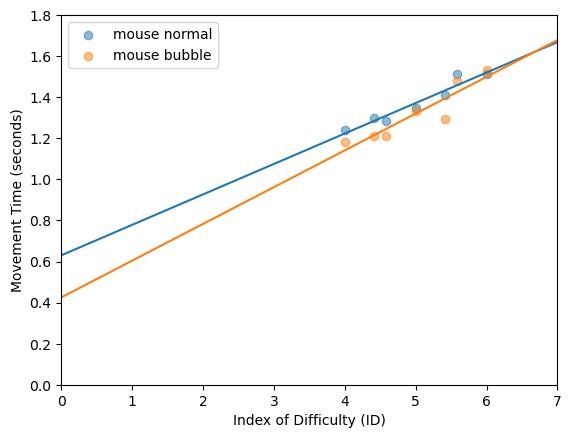

In [12]:
# x_axis = [0, 7]
# y_axis = [0, 1.8]
# tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
# extended_x = np.linspace(*x_axis, 100)

# for d in ["mouse", "tablet"]:
#   for m in ["normal", "bubble"]:
#     x = tmp.T[d][m].T.index.to_numpy()
#     y = tmp.T[d][m].T["clickTime"].to_numpy()
#     plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
#     p = np.polyfit(x, y, 1)
#     plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

# plt.legend()
# plt.axis(x_axis + y_axis)
# plt.xlabel("Index of Difficulty (ID)")
# plt.ylabel("Movement Time (seconds)")
# plt.show()
x_axis = [0, 7]
y_axis = [0, 1.8]
tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
extended_x = np.linspace(*x_axis, 100)

for d in ["mouse"]:
  for m in ["normal", "bubble"]:
    x = tmp.T[d][m].T.index.to_numpy()
    y = tmp.T[d][m].T["clickTime"].to_numpy()
    plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
    p = np.polyfit(x, y, 1)
    plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

plt.legend()
plt.axis(x_axis + y_axis)
plt.xlabel("Index of Difficulty (ID)")
plt.ylabel("Movement Time (seconds)")
plt.show()

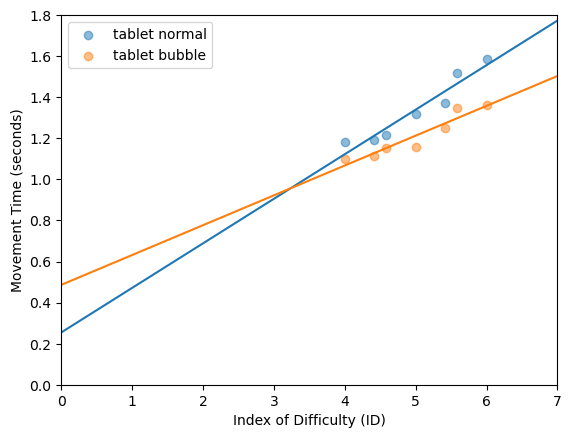

In [20]:
x_axis = [0, 7]
y_axis = [0, 1.8]
tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
extended_x = np.linspace(*x_axis, 100)

for d in ["tablet"]:
  for m in ["normal", "bubble"]:
    x = tmp.T[d][m].T.index.to_numpy()
    y = tmp.T[d][m].T["clickTime"].to_numpy()
    plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
    p = np.polyfit(x, y, 1)
    plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

plt.legend()
plt.axis(x_axis + y_axis)
plt.xlabel("Index of Difficulty (ID)")
plt.ylabel("Movement Time (seconds)")
plt.show()

In [159]:
# stats for groups
df.groupby(["Device", "Mode"]).describe()

AvgTime                                                    \
                count      mean       std       min       25%       50%   
Device Mode                                                               
mouse  bubble     5.0  1.322989  0.198640  1.087525  1.139963  1.412562   
       normal     5.0  1.365618  0.191689  1.238508  1.241599  1.293318   
tablet bubble     5.0  1.200725  0.149765  0.955058  1.194376  1.222574   
       normal     5.0  1.333762  0.150889  1.099004  1.324310  1.347727   

                                  Total Time            ...                    \
                    75%       max      count      mean  ...      75%      max   
Device Mode                                             ...                     
mouse  bubble  1.429256  1.545640        5.0  320.1634  ...  345.880  374.045   
       normal  1.357169  1.697496        5.0  330.4796  ...  328.435  410.794   
tablet bubble  1.281455  1.350161        5.0  290.5754  ...  310.112  326.739   
       normal  1.381178  1.516591        5.0  322.7704  ...  334.245  367.015   

              Errors                                                        \
               count    mean          std     min     25%     50%      75%   
Device Mode                                                                  
mouse  bubble    5.0  1583.0  1891.443629   242.0   475.0   704.0   1670.0   
       normal    5.0  2991.0  2289.006662  1095.0  1149.0  2335.0   3794.0   
tablet bubble    5.0  4554.0  4270.707494   509.0  1832.0  2160.0   8271.0   
       normal    5.0  9925.8  8429.241822  2891.0  3238.0  5371.0  18012.0   

                        
                   max  
Device Mode             
mouse  bubble   4824.0  
       normal   6582.0  
tablet bubble   9998.0  
       normal  20117.0  

[4 rows x 24 columns]

<AxesSubplot: >

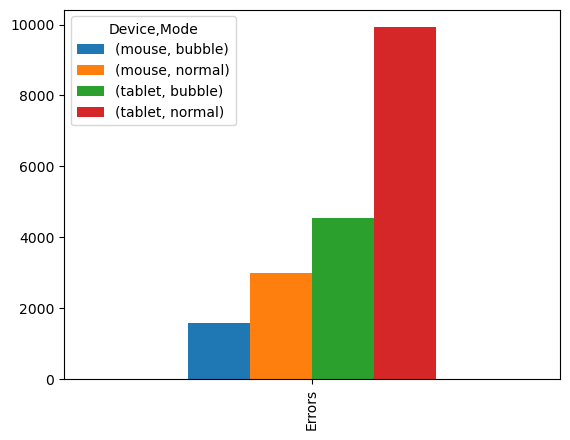

In [15]:
# plotting test
df.groupby(["Device", "Mode"])[["Errors"]].mean().T.plot.bar()

<AxesSubplot: >

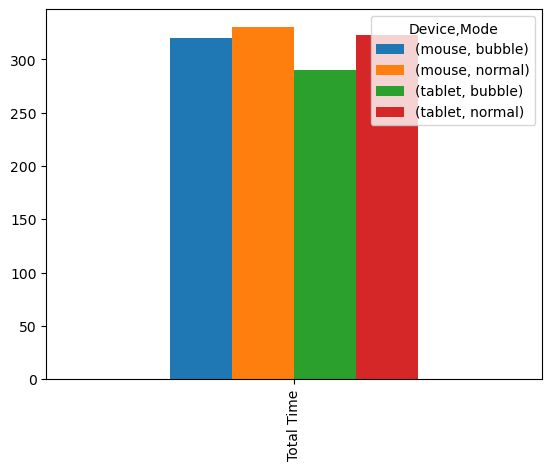

In [16]:
df.groupby(["Device", "Mode"])[["Total Time"]].mean().T.plot.bar()